### 기업 프로젝트 : 데이터 전처리

1. Load Data

In [1]:
import pandas as pd

data = pd.read_csv('../DATA/바웰공정데이터.csv', encoding='cp949')
data.head()

,time,E_scr_pv,E_scr_sv,c_temp_pv,c_temp_sv,k_rpm_pv,k_rpm_sv,n_temp_pv,n_temp_sv,scale_pv,s_temp_pv,s_temp_sv
0,2023-05-18T15:09:19.018900Z,8,8,69.6,70,189,180,67.2,70,3.01,67.1,70
1,2023-05-18T15:09:20.128150Z,8,8,69.8,70,189,180,67.2,70,3.01,67.0,70
2,2023-05-18T15:12:38.819460Z,8,8,69.7,70,189,180,67.9,70,3.08,65.9,70
3,2023-05-18T15:12:39.958188Z,8,8,69.7,70,189,180,67.8,70,3.08,65.9,70
4,2023-05-18T15:12:41.050178Z,8,8,69.7,70,189,180,67.8,70,3.08,65.9,70


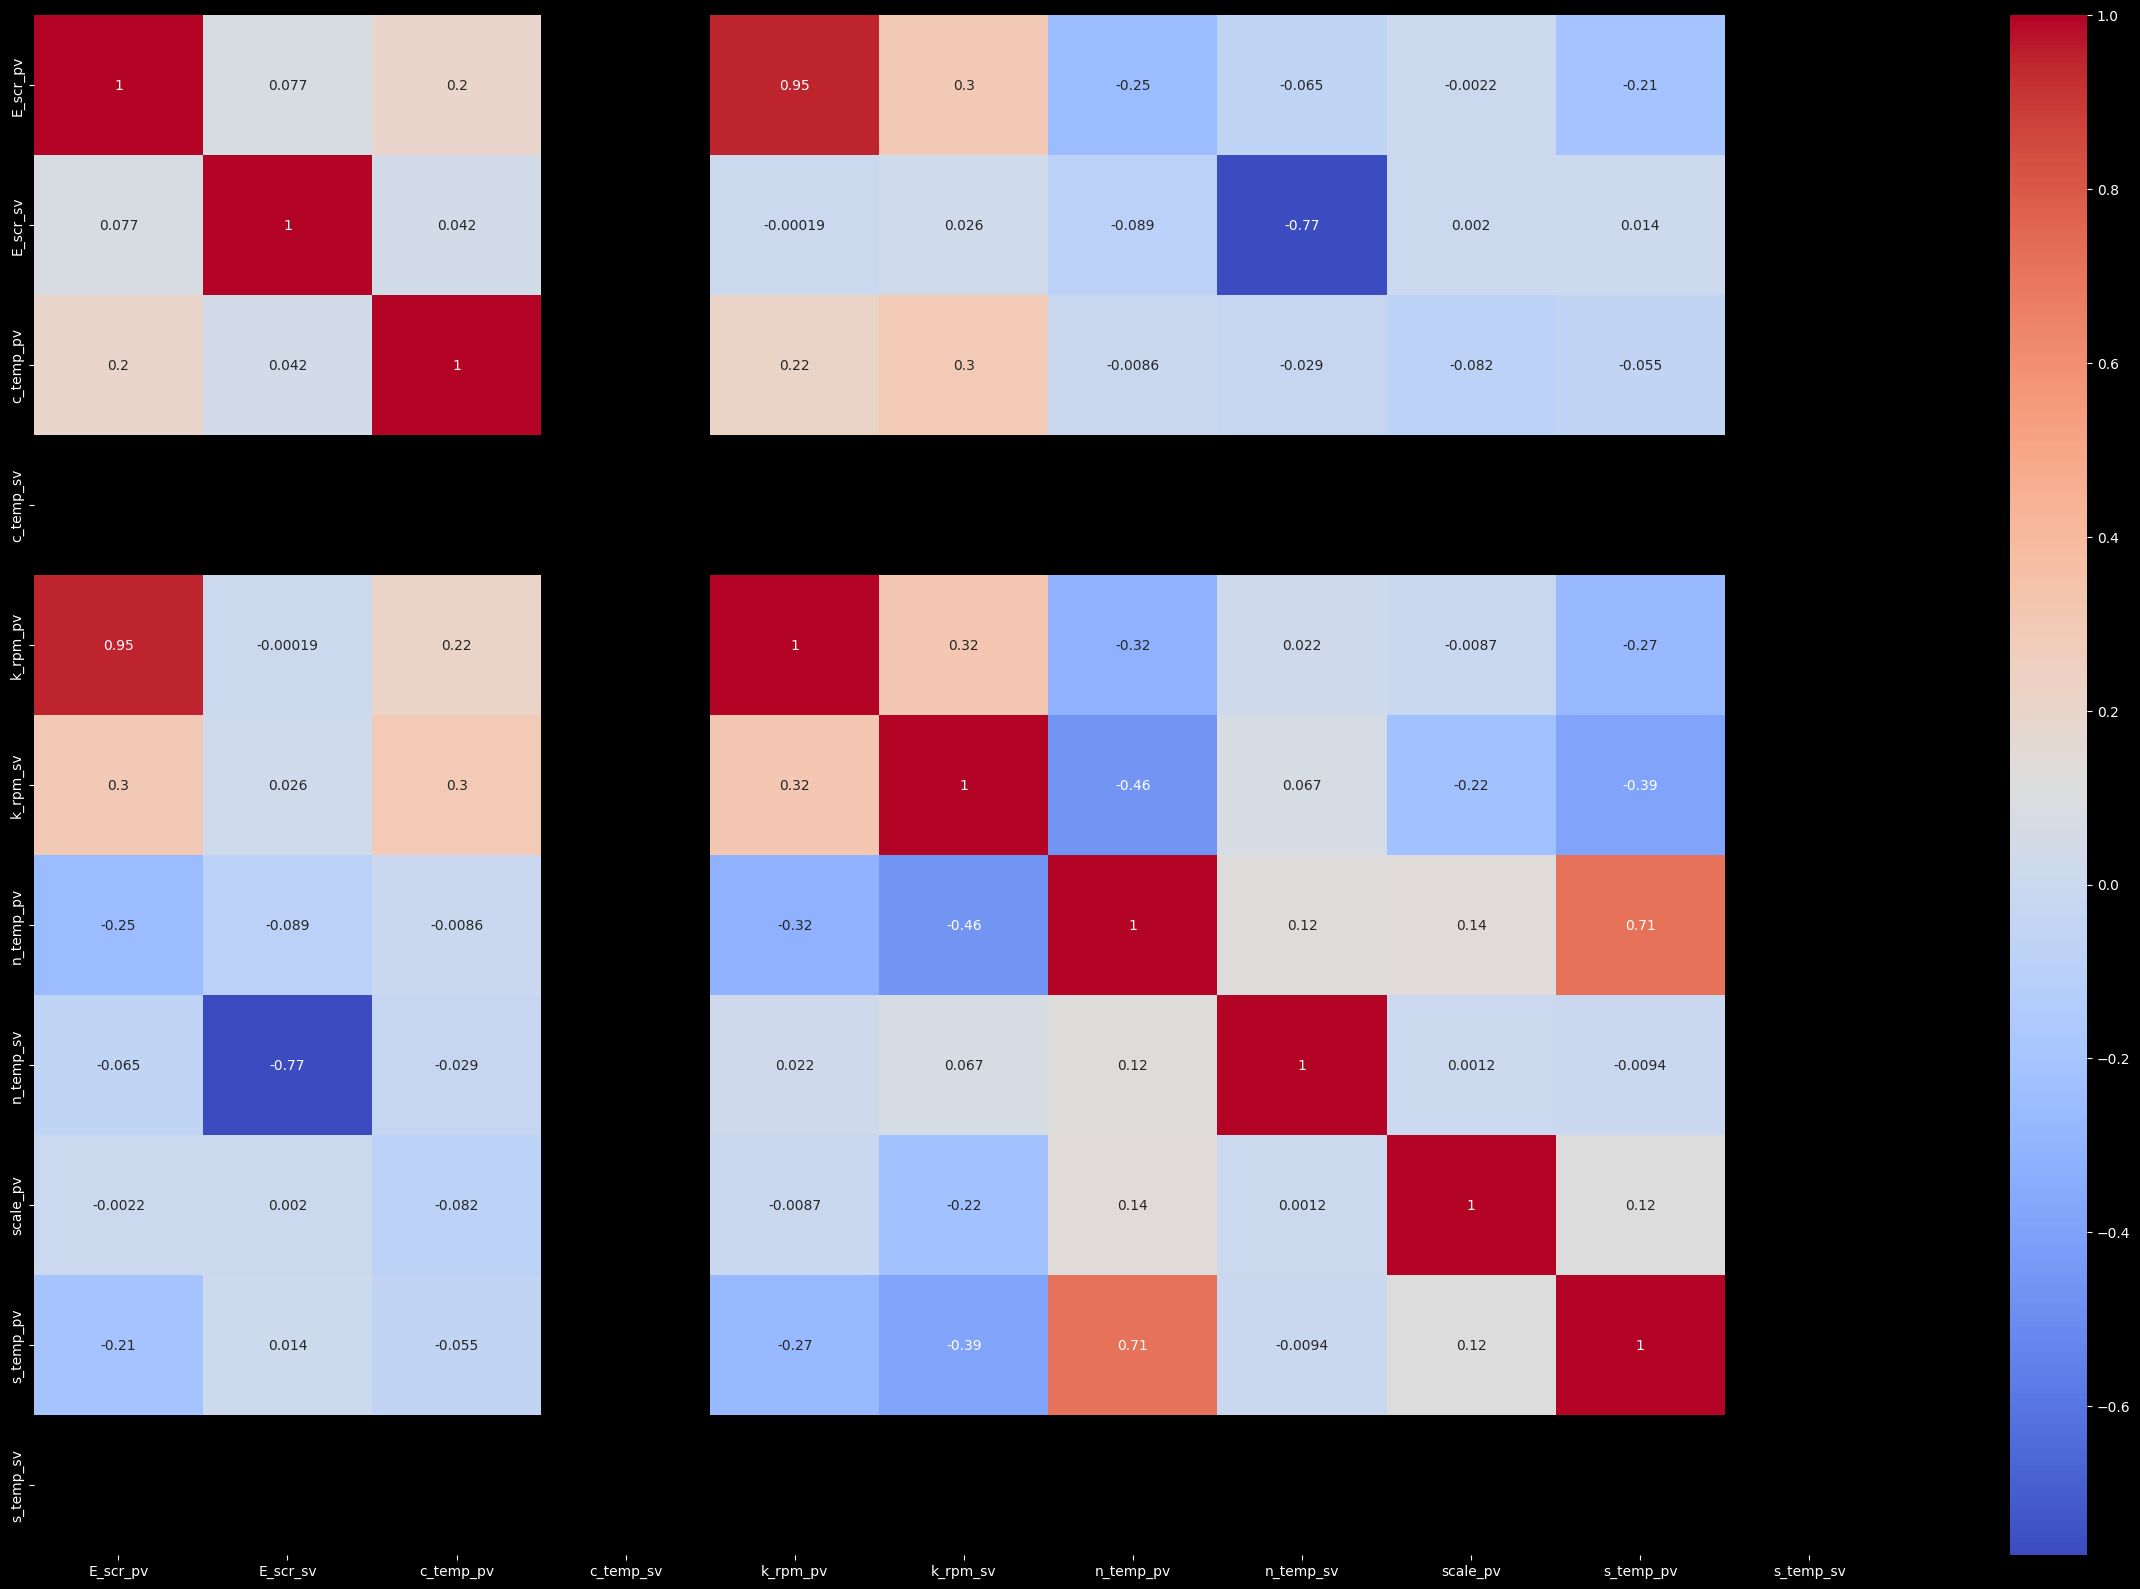

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
data.drop('time', axis=1, inplace=True)
plt.figure(figsize=(30, 20))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143091 entries, 0 to 143090
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   time       143091 non-null  object 
 1   E_scr_pv   143091 non-null  int64  
 2   E_scr_sv   143091 non-null  int64  
 3   c_temp_pv  143091 non-null  float64
 4   c_temp_sv  143091 non-null  int64  
 5   k_rpm_pv   143091 non-null  int64  
 6   k_rpm_sv   143091 non-null  int64  
 7   n_temp_pv  143091 non-null  float64
 8   n_temp_sv  143091 non-null  int64  
 9   scale_pv   143091 non-null  float64
 10  s_temp_pv  143091 non-null  float64
 11  s_temp_sv  143091 non-null  int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 13.1+ MB


In [63]:
data.describe()

,E_scr_pv,E_scr_sv,c_temp_pv,c_temp_sv,k_rpm_pv,k_rpm_sv,n_temp_pv,n_temp_sv,scale_pv,s_temp_pv,s_temp_sv
count,143091.000000,143091.000000,143091.000000,143091.0,143091.000000,143091.000000,143091.000000,143091.000000,143091.000000,143091.000000,143091.0
mean,7.820715,7.997666,70.448102,70.0,174.427735,173.928619,67.972548,69.976518,8.424822,67.774065,70.0
std,1.180048,0.095067,0.438494,0.0,27.542531,11.941990,1.189133,1.281862,71.109769,1.319734,0.0
min,0.000000,7.000000,65.100000,70.0,0.000000,130.000000,57.700000,0.000000,0.000000,65.500000,70.0
25%,8.000000,8.000000,70.200000,70.0,175.000000,180.000000,67.100000,70.000000,0.000000,66.700000,70.0
50%,8.000000,8.000000,70.400000,70.0,178.000000,180.000000,67.500000,70.000000,0.000000,67.700000,70.0
75%,8.000000,8.000000,70.700000,70.0,183.000000,180.000000,69.000000,70.000000,0.000000,68.500000,70.0
max,12.000000,12.000000,72.800000,70.0,198.000000,180.000000,71.200000,70.000000,655.350000,72.400000,70.0


sv 값이 일정하지 않은 부분이 있다. scale의 값도 크게 다른 부분이 있다

### 1. Extracting the sv values
(1) sv 값 확인  
(2) pv 값과의 오차로 피처 생성

In [64]:
# sv 데이터의 값의 종류 확인
# - sv 는 짝수 열에 위치 - 아니네;; 임의로 지정하기
sv = data.iloc[:, [2, 4, 6, 8, -1]]
sv.head()

,E_scr_sv,c_temp_sv,k_rpm_sv,n_temp_sv,s_temp_sv
0,8,70,180,70,70
1,8,70,180,70,70
2,8,70,180,70,70
3,8,70,180,70,70
4,8,70,180,70,70


In [65]:
for i in range(5):
    print(sv.iloc[:, i].value_counts())
    print()

E_scr_sv
8     142517
7        526
12        48
Name: count, dtype: int64

c_temp_sv
70    143091
Name: count, dtype: int64

k_rpm_sv
180    112731
150     28162
170      2150
130        48
Name: count, dtype: int64

n_temp_sv
70    143043
0         48
Name: count, dtype: int64

s_temp_sv
70    143091
Name: count, dtype: int64



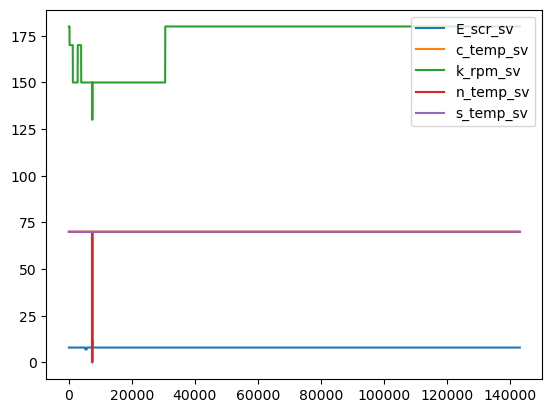

In [66]:
# sv visualization
import matplotlib.pyplot as plt

plt.plot(sv)
plt.legend(sv.columns)
plt.show()

### 분석 결과
1. temp 값은 항상 일정하게 고정됨
2. n_temp_sv는 일정 구간만 0으로 설정

In [67]:
# n_temp_sv == 0 인 데이터
print(data[data['n_temp_sv'] == 0].index)
data[data['n_temp_sv'] == 0].describe()

Index([7393, 7394, 7395, 7396, 7397, 7398, 7399, 7400, 7401, 7402, 7403, 7404,
       7405, 7406, 7407, 7408, 7409, 7410, 7411, 7412, 7413, 7414, 7415, 7416,
       7417, 7418, 7419, 7420, 7421, 7422, 7423, 7424, 7425, 7426, 7427, 7428,
       7429, 7430, 7431, 7432, 7433, 7434, 7435, 7436, 7437, 7438, 7439, 7440],
      dtype='int64')


,E_scr_pv,E_scr_sv,c_temp_pv,c_temp_sv,k_rpm_pv,k_rpm_sv,n_temp_pv,n_temp_sv,scale_pv,s_temp_pv,s_temp_sv
count,48.0,48.0,48.000000,48.0,48.00000,48.0,48.000000,48.0,48.000000,48.000000,48.0
mean,12.0,12.0,71.150000,70.0,141.56250,130.0,59.970833,0.0,3.938125,68.447917,70.0
std,0.0,0.0,1.058903,0.0,10.35314,0.0,2.923053,0.0,0.147066,1.190206,0.0
min,12.0,12.0,70.100000,70.0,117.00000,130.0,57.700000,0.0,3.590000,67.100000,70.0
25%,12.0,12.0,70.200000,70.0,140.00000,130.0,57.900000,0.0,3.850000,67.475000,70.0
50%,12.0,12.0,70.500000,70.0,147.50000,130.0,58.000000,0.0,4.030000,68.000000,70.0
75%,12.0,12.0,72.700000,70.0,150.00000,130.0,64.300000,0.0,4.040000,69.900000,70.0
max,12.0,12.0,72.800000,70.0,150.00000,130.0,64.800000,0.0,4.070000,70.600000,70.0


0으로 설정된 구간은  
6월 30일 16:44:29 부터 16:56:17까지 (직전은 당일 15:20:50, 직후는 7월 5일)  
중량값은 3.59 ~ 4.07에 평균 3.93으로 원하는 3그램에 많이 다름  
=> 해당 구간 제외

In [68]:
# n_temp_sv == 0 인 데이터 제거
data = data[data['n_temp_sv'] != 0]
data.describe()

,E_scr_pv,E_scr_sv,c_temp_pv,c_temp_sv,k_rpm_pv,k_rpm_sv,n_temp_pv,n_temp_sv,scale_pv,s_temp_pv,s_temp_sv
count,143043.000000,143043.000000,143043.000000,143043.0,143043.000000,143043.000000,143043.000000,143043.0,143043.000000,143043.000000,143043.0
mean,7.819313,7.996323,70.447867,70.0,174.438763,173.943360,67.975233,70.0,8.426328,67.773839,70.0
std,1.177759,0.060529,0.437959,0.0,27.539931,11.916846,1.179073,0.0,71.121652,1.319722,0.0
min,0.000000,7.000000,65.100000,70.0,0.000000,150.000000,65.700000,70.0,0.000000,65.500000,70.0
25%,8.000000,8.000000,70.200000,70.0,175.000000,180.000000,67.100000,70.0,0.000000,66.700000,70.0
50%,8.000000,8.000000,70.400000,70.0,178.000000,180.000000,67.500000,70.0,0.000000,67.700000,70.0
75%,8.000000,8.000000,70.700000,70.0,183.000000,180.000000,69.000000,70.0,0.000000,68.500000,70.0
max,8.000000,8.000000,71.900000,70.0,198.000000,180.000000,71.200000,70.0,655.350000,72.400000,70.0


### 2. scale 이상치 제거

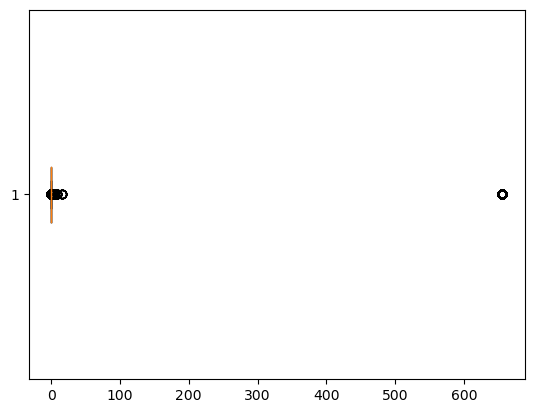

In [69]:
scales = data['scale_pv']

# boxplot
plt.boxplot(scales, vert=False)
plt.show()

In [70]:
print(f'전체 데이터 개수: {len(scales)}')
print(f'100 < scale_pv 데이터 개수: {len(scales[scales > 100])}')
print(f'10 < scale_pv 데이터 개수: {len(scales[scales > 10])}')
print(f'1 > scale_pv 데이터 개수: {len(scales[scales < 1])}')
print(f'0.5 > scale_pv 데이터 개수: {len(scales[scales < 0.5])}')

# 1 < scale_pv < 100 인 데이터만 우선 추출
scales = scales[(scales > 1) & (scales < 10)]

전체 데이터 개수: 143043
100 < scale_pv 데이터 개수: 1708
10 < scale_pv 데이터 개수: 1719
1 > scale_pv 데이터 개수: 113174
0.5 > scale_pv 데이터 개수: 113145


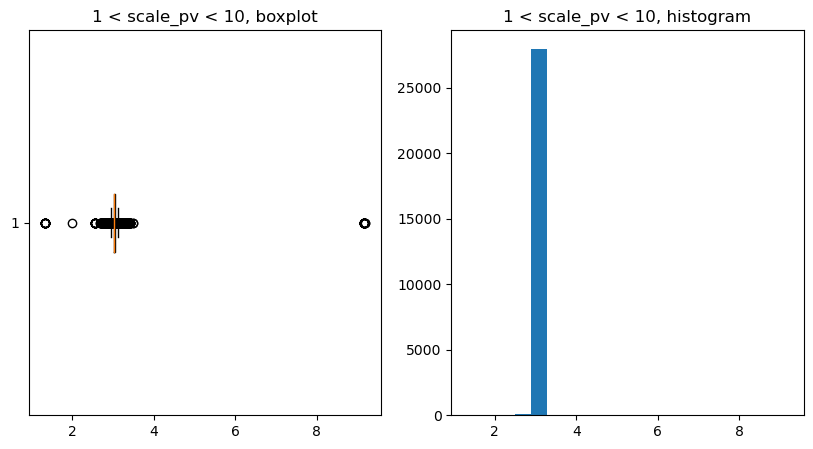

In [71]:
# boxplot, histogram
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.boxplot(scales, vert=False)
plt.title('1 < scale_pv < 10, boxplot')
plt.subplot(1, 2, 2)
plt.hist(scales, bins=20)
plt.title('1 < scale_pv < 10, histogram')
plt.show()

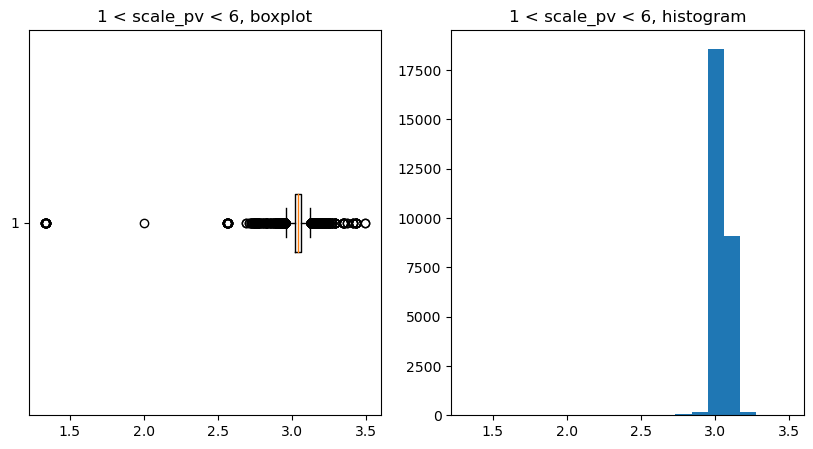

In [72]:
# 1 < scale_pv < 6 boxplot, histogram
scales = scales[scales < 6]

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.boxplot(scales, vert=False)
plt.title('1 < scale_pv < 6, boxplot')
plt.subplot(1, 2, 2)
plt.hist(scales, bins=20)
plt.title('1 < scale_pv < 6, histogram')
plt.show()

4 < scale < 10 구간은 없으므로 2 < scale < 4로 설정

2 < scale_pv < 4 데이터 개수: 28119


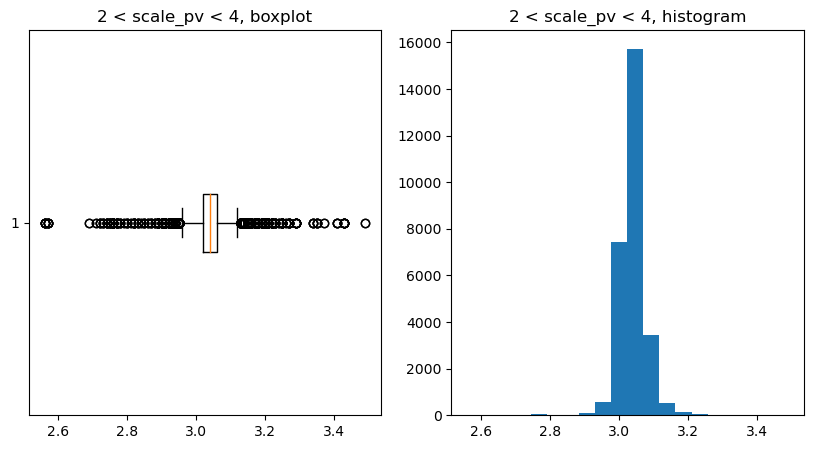

In [73]:
# 2 < scale_pv < 4 boxplot, histogram
scales = scales[(scales > 2) & (scales < 4)]
print(f'2 < scale_pv < 4 데이터 개수: {len(scales)}')

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.boxplot(scales, vert=False)
plt.title('2 < scale_pv < 4, boxplot')
plt.subplot(1, 2, 2)
plt.hist(scales, bins=20)
plt.title('2 < scale_pv < 4, histogram')
plt.show()

대부분의 유효한 값은 2 ~ 4에 분포, 28,119 개

2 < scale_pv < 4 데이터 개수: 28119


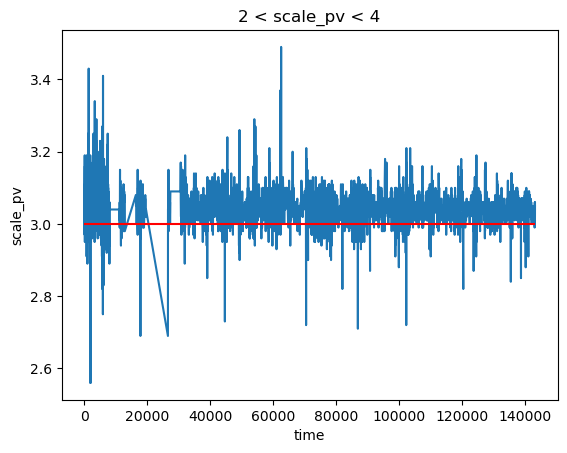

In [74]:
scales = scales[(scales > 2) & (scales < 4)]
print(f'2 < scale_pv < 4 데이터 개수: {len(scales)}')

plt.plot(scales)
plt.title('2 < scale_pv < 4')
plt.xlabel('time')
plt.ylabel('scale_pv')
plt.hlines(3, 0, len(data), 'r')
plt.show()

In [75]:
data = data[data['scale_pv'].isin(scales)]
data.describe()

,E_scr_pv,E_scr_sv,c_temp_pv,c_temp_sv,k_rpm_pv,k_rpm_sv,n_temp_pv,n_temp_sv,scale_pv,s_temp_pv,s_temp_sv
count,28119.000000,28119.000000,28119.000000,28119.0,28119.000000,28119.000000,28119.000000,28119.0,28119.000000,28119.000000,28119.0
mean,7.975959,7.981365,70.367460,70.0,179.874142,174.058110,67.610708,70.0,3.041950,67.411839,70.0
std,0.247597,0.135235,0.469105,0.0,9.358303,11.332122,0.919268,0.0,0.041755,1.126389,0.0
min,0.000000,7.000000,68.800000,70.0,0.000000,150.000000,65.700000,70.0,2.560000,65.500000,70.0
25%,8.000000,8.000000,70.100000,70.0,176.000000,180.000000,67.000000,70.0,3.020000,66.400000,70.0
50%,8.000000,8.000000,70.400000,70.0,180.000000,180.000000,67.300000,70.0,3.040000,67.300000,70.0
75%,8.000000,8.000000,70.700000,70.0,186.000000,180.000000,67.900000,70.0,3.060000,68.200000,70.0
max,8.000000,8.000000,71.900000,70.0,196.000000,180.000000,71.100000,70.0,3.490000,71.500000,70.0


표준 편차를 볼 때 rpm 설정값을 변경한 것으로 보임, temp sv는 거의 변동이 없지만 노즐과 스크류는 1에 가까운 큰 변동폭을 보임

### 3. sv 와 pv 편차로 피처 생성

In [76]:
# 1. scale_pv 가 2.5 < scale_pv < 3.5 인 데이터만 추출
data_scales = data[(data['scale_pv'] > 2.5) & (data['scale_pv'] < 3.5)]
data_scales.describe()

,E_scr_pv,E_scr_sv,c_temp_pv,c_temp_sv,k_rpm_pv,k_rpm_sv,n_temp_pv,n_temp_sv,scale_pv,s_temp_pv,s_temp_sv
count,28119.000000,28119.000000,28119.000000,28119.0,28119.000000,28119.000000,28119.000000,28119.0,28119.000000,28119.000000,28119.0
mean,7.975959,7.981365,70.367460,70.0,179.874142,174.058110,67.610708,70.0,3.041950,67.411839,70.0
std,0.247597,0.135235,0.469105,0.0,9.358303,11.332122,0.919268,0.0,0.041755,1.126389,0.0
min,0.000000,7.000000,68.800000,70.0,0.000000,150.000000,65.700000,70.0,2.560000,65.500000,70.0
25%,8.000000,8.000000,70.100000,70.0,176.000000,180.000000,67.000000,70.0,3.020000,66.400000,70.0
50%,8.000000,8.000000,70.400000,70.0,180.000000,180.000000,67.300000,70.0,3.040000,67.300000,70.0
75%,8.000000,8.000000,70.700000,70.0,186.000000,180.000000,67.900000,70.0,3.060000,68.200000,70.0
max,8.000000,8.000000,71.900000,70.0,196.000000,180.000000,71.100000,70.0,3.490000,71.500000,70.0


In [77]:
# 2. _pv 와 _sv 데이터 간 차이 컬럼 생성
data_scales.columns

Index(['time', 'E_scr_pv', 'E_scr_sv', 'c_temp_pv', 'c_temp_sv', 'k_rpm_pv',
       'k_rpm_sv', 'n_temp_pv', 'n_temp_sv', 'scale_pv', 's_temp_pv',
       's_temp_sv'],
      dtype='object')